In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
CHAR_MAPPING = {
    "x" : -1,
    "." : 0,
    "H" : 1,
    "h" : 2, 
    "s": 3
}
COLOR_MAPPING = ["black", "white", "blue", "green", "red"]
MAP_SIMPLE_NAME = "map.txt"

def load_map(mapname, char_mapping):
    with open(mapname, 'r') as map_file:
        lines = map_file.readlines()
        width = int(lines[0])
        height = int(lines[1])
        map_numbers = [[char_mapping[chr] for chr in row[:-1]] for row in lines[2:]]
    return np.array(map_numbers, dtype = np.int32)


  
    #plt.figure()
    #plt.imshow(map , cmap = matplotlib.colors.ListedColormap(COLOR_MAPPING))

    #plt.show()

simple_map = load_map(MAP_SIMPLE_NAME, CHAR_MAPPING)
hider_pos = np.asarray(np.where(simple_map == CHAR_MAPPING["h"])).reshape(2)
seeker_pos = np.asarray(np.where(simple_map == CHAR_MAPPING["s"])).reshape(2)
#start configuration
MAP_START = np.copy(simple_map)
MAP_START[hider_pos[0], hider_pos[1]] = CHAR_MAPPING["."]
MAP_START[seeker_pos[0], seeker_pos[1]] = CHAR_MAPPING["."]




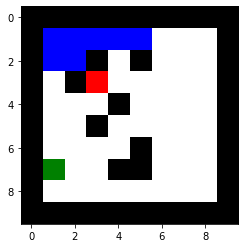

In [13]:
f = plt.figure()
graph1 = f.add_subplot(211)
def plot_map(map):
    clear_output(wait=True)
    plt.figure()
    plt.imshow(map , cmap = matplotlib.colors.ListedColormap(COLOR_MAPPING))
    plt.show()

def get_percepts(map_env, pos, agent = "h"):
    VISION = 1
    return map_env [pos[0] - VISION : pos[0] + VISION, pos[1] - VISION : pos[1] + VISION]

ACTIONS = [[0,0], [-1,0], [1, 0], [0, -1], [0, 1]]

def is_free(map_env, pos, agent):
    if (agent == "h"):
        return map_env[pos[0], pos[1]] in [CHAR_MAPPING["."], CHAR_MAPPING["H"], CHAR_MAPPING["h"]]
    return map_env[pos[0], pos[1]] in [CHAR_MAPPING["."], CHAR_MAPPING["s"]]


def do_action(map_env, pos, action, agent):
    new_pos = pos + ACTIONS[action]
    #print(new_pos)
    if is_free(map_env, new_pos, agent) and not np.all(new_pos == pos):
        #print(True)
        map_env[new_pos[0], new_pos[1]] = CHAR_MAPPING[agent]
        map_env[pos[0], pos[1]] = MAP_START[pos[0], pos[1]]
        return map_env, new_pos
    else:
        #print(False)
        return map_env, pos




def simulate_step(map_env, pos_hide, pos_seek, policy_hide, policy_seek, **kwargs):

    action_hide = policy_hide(get_percepts(map_env, pos_hide, "h"),"s" **kwargs)
    map_env, new_pos_hide = do_action(map_env, pos_hide, action_hide, "h")
    #print(action_hide)
    #plot_map(map_env)
    action_seek = policy_seek(get_percepts(map_env, pos_seek, "s"), "s", **kwargs)
    map_env, new_pos_seek = do_action(map_env, pos_seek, action_seek, "s")
    #print(action_seek)
    #plot_map(map_env)
    return (map_env, new_pos_hide, new_pos_seek)

import time
from IPython.display import clear_output
def eval_map_state():
    pass

def is_end(map_env, pos_hide, pos_seek):
    pass

def simulate(map_env, start_hide, start_seek, policy_hide, policy_seek, num_steps = 100, **kwargs):
    pos_hide, pos_seek = start_hide, start_seek
    for step in range(num_steps):
        map_env, pos_hide, pos_seek = simulate_step(map_env, pos_hide, pos_seek, policy_hide, policy_seek, **kwargs)
        time.sleep(0.03)
        #print(pos_hide)
        #print(pos_seek)
        plot_map(map_env)
        if(is_end(map_env, pos_hide, pos_seek)):
            break
    return eval_map_state(map_env, pos_hide, pos_seek)

def random_policy(percepts, agent, **kwargs):
    return np.random.randint(len(ACTIONS))
#print(simple_map)

simulate(np.copy(simple_map), hider_pos, seeker_pos, random_policy, random_policy)


In [ ]:
#TODO implement policy as NN
#TODO implement EA

def NN_policy(percepts, agent, **kwargs):
    if agent == "h":
        network = kwargs.get("seek_net")
    else:
        network = kwargs.get("hide_net")
    
    output = network.activate(percepts.reshape(-1))
    
def 